

## Lab 2

Welcome to the second lab of the AIML!
In addition to implementing code, there will be questions that you must answer which relate to the lab and your implementation. Each question you will answer is preceded by a **'Question X'** header. Carefully read each question and provide you answer or code in the following textboxes with **'Answer:'** header. Your lab submission will be evaluated based on your answers to each of the questions and the implementation you provide.

## Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Chi-Squared Tests

## Question 1 (0.5 points)

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm and a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

In [1]:
import pandas as pd
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power
GPU1 = pd.DataFrame([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = pd.DataFrame([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

#Assumption: Both the datasets (GPU1 & GPU 2) are random, independent, parametric & normally distributed

Hint: You can import ttest function from scipy to perform t tests 

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

#### Answer:

In [2]:
t_statistic, p_value = ttest_ind(GPU1,GPU2)
print(t_statistic, p_value)

[-2.62762951] [0.01379428]


In [ ]:
# Pvalue is less than 0.05 , so reject null hypothesis 

## Question 2 (0.5 points)

He is trying a third GPU - GPU3.

In [4]:
GPU3 = pd.DataFrame([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])
#t_statistic, p_value = ttest_ind(GPU1,GPU3)
t_statistic, p_value = ttest_ind(GPU1,GPU3)
print(t_statistic, p_value)

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed
# The pvalue is greater than 0.05 ie 0.14509211 hence you cannot reject the null hypothesis 

[-1.49889438] [0.14509211]


*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

### ANOVA

## Question 3 (0.5 points)

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed
But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [6]:
import pandas as pd
import numpy as np
from scipy.stats import levene, shapiro, f_oneway
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
e1 = pd.DataFrame([1.595440,1.419730,0.000000,0.000000])
e2 = pd.DataFrame([1.433800,2.079700,0.892139,2.384740])
e3 = pd.DataFrame([0.036930,0.938018,0.995956,1.006970])

In [7]:
# Levene's Test

# H0: All variances are equal
# Ha: Atleast one of the variances not equal

levene(e1,e2,e3)

# p-value > 0.05 hence all variances are equal
# pvalue is greater than 0.05 ie 0.12259793 test equality of variance is satisfied 

LeveneResult(statistic=array([2.67417257]), pvalue=array([0.12259793]))

In [11]:
f, p = f_oneway(e1,e2,e3)
print ('F value:', f)
print ('P value:', p, '\n')


F value: [2.51357623]
P value: [0.13574645] 



#### Answer:

## Question 4 (0.5 points)

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

In [ ]:
#Type 1 error is a wrong decisson made on rejecting the null hypothesis Ho 
#Typ 2 error  isa wromg decison made to not rejectiing H0 

## Question 5 (0.5 points)

Explain how the higher confidence value effects TypeI and TypeII error.

#### Answer:


In [ ]:
#  if the confidence level (1-a) increases , Type 1 error decreases 
# if the a increses , Confidence level decreases , Type II error increses 



## Question 6 (0.5 points)

*A computer expert wants to test the null hypothesis that a new GPU is no more effective than the older model.*

Lets consider that he selects the GPU which he think is more effective.

Now, find out which GPU he has selected if he made Type I error. And give reasoning about which is more effective.

**Answer:**

In [ ]:
T1 error - Rejecteing a good candidate selecting a bad 1  . T2 error - 

## Question 7 (0.5 points)

From question6, if he made Type II error.

*Now, find out which GPU he has selected. And give reasoning about which is more effective.*

#### Answer:

In [ ]:
From the query 6 , if he made a Type II error , Now find out which GPU has selected ,and give resoning which is more effective 

# Linear Regression


# Simple Linear Regression

## Dataset

Population of U.S. Cities

### Description
The bigcity data frame has 49 rows and 2 columns.

The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.

### Format
This data frame contains the following columns:

`u`
The 1920 population.

`x`
The 1930 population.

Source

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.

# Question 8 (0.5 points)
Read the dataset given in file named 'bigcity.csv'.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [23]:
bigcity = pd.read_csv('bigcity.csv')
bigcity.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


In [24]:
bigcity= bigcity.iloc[:,1:3]

In [26]:
bigcity.head()

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75


# Question 9 - Transform the dataset (0.5 points)
Find the number of rows in given dataset and separate the input and target variables into X and Y.
Hint: You can shape function to get the size of the dataframe

In [28]:
bigcity.shape

(49, 2)

In [38]:
X = bigcity[['u']]
Y = bigcity['x']
print(X,Y)

      u
0   138
1    93
2    61
3   179
4    48
5    37
6    29
7    23
8    30
9     2
10   38
11   46
12   71
13   25
14  298
15   74
16   50
17   76
18  381
19  387
20   78
21   60
22  507
23   50
24   77
25   64
26   40
27  136
28  243
29  256
30   94
31   36
32   45
33   67
34  120
35  172
36   66
37   46
38  121
39   44
40   64
41   56
42   40
43  116
44   87
45   43
46   43
47  161
48   36 0     143
1     104
2      69
3     260
4      75
5      63
6      50
7      48
8     111
9      50
10     52
11     53
12     79
13     57
14    317
15     93
16     58
17     80
18    464
19    459
20    106
21     57
22    634
23     64
24     89
25     77
26     60
27    139
28    291
29    288
30     85
31     46
32     53
33     67
34    115
35    183
36     86
37     65
38    113
39     58
40     63
41    142
42     64
43    130
44    105
45     61
46     50
47    232
48     54
Name: x, dtype: int64


## Question 10 - Check the dataset for any missing values and also print out the correlation matrix (0.5 points)

You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [32]:
bigcity.isna()


,u,x
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [34]:
bigcity.corr()

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


### The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# Question 11 - Split data into train, test sets (0.5 points)
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

Check: train_test_split function

In [40]:
from sklearn.model_selection import train_test_split   
#sklearn.midel selection ....splits train and test data  ( for time series u should not use train_test_plit)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

#  test_size = 30%n(standard industry best practice , random_state is set seed value - how many time u run same set of data train and test data ) )

Coefficients: 
  [1.16801021]
Intercept: 
  5.177928310439086


# Question 12 - Find coefficients & intercept (0.5 points)
Estimate the coefficients b0 and b1 using scikit-learn.

Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [42]:
from sklearn.linear_model import LinearRegression
lm1 =  LinearRegression()
lm1.fit(X_train,y_train)
b1=lm1.coef_
b0=lm1.intercept_
print('Coefficients: \n ',b1)
print('Intercept: \n ',b0)

Coefficients: 
  [1.16801021]
Intercept: 
  5.177928310439086


# Question 13 - Linear Relationship between feature and target (0.5 points)
Plot the line with b1 and b0 as slope and y-intercept.

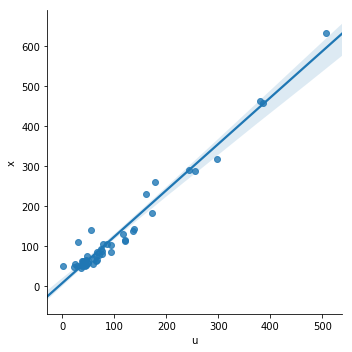

In [60]:
import seaborn as sns
sns.lmplot(x="u", y="x", data=bigcity)

# Question 14 - Evaluation of model with scikit-learn (0.5 points)
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean square error over mean square error gives you root mean square error

In [47]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 14.995649845729616
MSE: 601.7905588971546
RMSE: 24.53141983043694


## Question 15 - Calculate the accuracy of the model for both training and test data set (0.5 points)

### Hint: .score() function 

In [55]:
accuracy_bigcity_training = metrics.r2_score(X_test,predictions)
print ('accuracy_bigcity_training',accuracy_bigcity_training)

accuracy_bigcity_test = metrics.r2_score(y_test,predictions)
print ('accuracy_bigcity_test',accuracy_bigcity_test)

accuracy_bigcity_training 0.8986197496736694
accuracy_bigcity_test 0.8828435399605278


# Supervised Learning - Building a Student Performace Prediction System


# Classification vs. Regression
The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Question 1 - Exploring the Data (0.5 points)
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

# Question 2 - drop missing values (0.5 points)
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*
*Use .dropna() function to drop the NAs*

#### Answer:

# Transform Data

## Question 3 (0.5 points)

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

# Question 4 - Drop variables with less variance (0.5 points)

*Find the variance of each numerical independent variable and drop whose variance is less than 1. Use .var function to check the variance*

#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

# Question 6 - Encode all categorical variables to numerical (0.5 points)

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

# Question 7 - Convert the continuous values of grades into classes (1 point)

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

# Question 8 (0.5 points)

*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate feature and target attributes into separate dataframes with X and y variable names.*

Answer

# Question 9 - Training and testing data split (0.5 points)

# *So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

# Question 10 - Model Implementation and Testing the Accuracy (0.5 points)

*Build a **LogisticRegression** classifier using **fit()** functions in sklearn. 
* You need to import both Logistic regression and accuracy score from sklearn*
#### Answer:

# Question 11 - Print the intercept of the Logistic regression model (0.5 points)

The value of the intercepts are stored in the model itself. You can use .intercept_ function to do the same

# Question 12 - Print the coefficients of the model (0.5 points) and name the coefficient which has the highest impact on the dependent variable (0.5 points)

Hint: Use .coef_ to get the coefficients and use pd.Dataframe to store the coefficients in a dataframe with column names same as the independent variable dataframe

# Question 13 - Predict the dependent variable for both training and test dataset (0.5 points)

Accuracy score() should help you to print the accuracies